<a href="https://colab.research.google.com/github/Dikabagas/Tubes-TKC-234_244/blob/main/Reka_Ulang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/TKC"

In [3]:
%cd /content/drive/MyDrive/TKC

/content/drive/MyDrive/TKC


In [4]:
!ls  

chest_xray  kaggle.json  model.h5  train  validation


In [5]:
!kaggle datasets download -d tolgadincer/labeled-chest-xray-images

 99% 1.17G/1.17G [00:32<00:00, 64.8MB/s]
100% 1.17G/1.17G [00:32<00:00, 39.0MB/s]


In [6]:
!unzip \*.zip &> /dev/null && rm *.zip

In [5]:
!ls  

chest_xray  kaggle.json  model.h5  train  validation


In [6]:
%cd /content/drive/MyDrive/TKC/chest_xray/

/content/drive/MyDrive/TKC/chest_xray


In [7]:
!ls  

test  train


In [8]:
base_dir = "/content/drive/My Drive/TKC/chest_xray"

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

pneumonia_train_dir = os.path.join(train_dir, 'PNEUMONIA')
normal_train_dir = os.path.join(train_dir, 'NORMAL')

pneumonia_test_dir = os.path.join(test_dir, 'PNEUMONIA')
normal_test_dir = os.path.join(test_dir, 'NORMAL')

In [9]:
print('total training Pneumonia images :', len(os.listdir(pneumonia_train_dir)))
print('total training Normal images :', len(os.listdir(normal_train_dir)))

print('\ntotal test Pneumonia images :', len(os.listdir(pneumonia_test_dir)))
print('total test Normal images :', len(os.listdir(normal_test_dir)))

total training Pneumonia images : 3883
total training Normal images : 1349

total test Pneumonia images : 390
total test Normal images : 234


In [11]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpeg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (148,148))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [12]:
# Gather data test
test_data = []
test_label = []
for r, d, f in os.walk(test_dir):
    for file in f:
        if ".jpeg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (148,148))
            test_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            test_label.append(label)

test_data = np.array(test_data)
test_label = np.array(test_label)

In [13]:
# Tampilkan shape dari data train, data val dan data test
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Test Data = ", test_data.shape)
print("Test Label = ", test_label.shape)

Train Data =  (5232, 148, 148, 3)
Train Label =  (5232,)
Test Data =  (624, 148, 148, 3)
Test Label =  (624,)


In [14]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_test = test_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [94 94 94]
Data setelah di-normalisasi  [0.36862746 0.36862746 0.36862746]


In [15]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[995:1005])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_test = lb.fit_transform(test_label)

print("Label setelah di-encoder ", y_train[995:1005])

Label sebelum di-encoder  ['NORMAL' 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL'
 'NORMAL' 'NORMAL']
Label setelah di-encoder  [0 0 0 0 0 0 0 0 0 0]


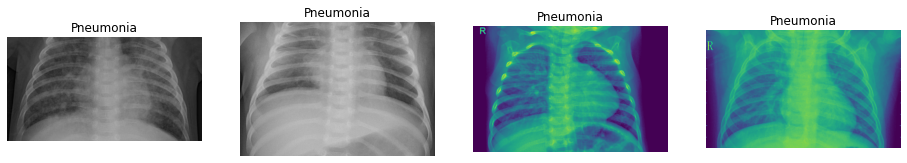

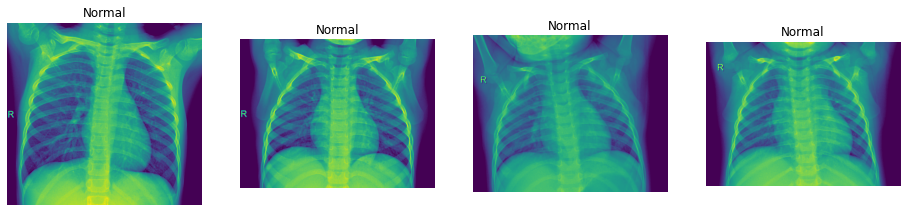

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mping

pneumonia_images = os.listdir(pneumonia_train_dir)
normal_images = os.listdir(normal_train_dir)

fname1 = [os.path.join(pneumonia_train_dir,fname)
        for fname in pneumonia_images[:4]]

fname2 = [os.path.join(normal_train_dir,fname)
        for fname in normal_images[:4]]

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname1):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Pneumonia')
    plt.imshow(img)
plt.show()

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname2):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Normal')
    plt.imshow(img)
plt.show()

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, SeparableConv2D, MaxPool2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
def conv_block(filters):
    block = Sequential([
        SeparableConv2D(filters, 3, activation='relu', padding='same'),
        SeparableConv2D(filters, 3, activation='relu', padding='same'),
        BatchNormalization(),
        MaxPool2D()
    ])
    
    return block

In [23]:
def dense_block(units, dropout_rate):
    block = Sequential([
        Dense(units, activation='relu'),
        BatchNormalization(),
        Dropout(dropout_rate)
    ])
    
    return block

In [40]:
def build_model():
    model = Sequential([
        Input(shape=(148, 148, 3)),

        Conv2D(16, 3, activation='relu', padding='same'),
        Conv2D(16, 3, activation='relu', padding='same'),
        MaxPool2D(),
        
        conv_block(32),
        conv_block(64),
        conv_block(128),
        
        Dropout(0.2),
        
        conv_block(256),
        
        Dropout(0.2),
        Flatten(),
        
        dense_block(512, 0.7),
        dense_block(128, 0.5),
        dense_block(64, 0.3),
        
        Dense(1, activation='sigmoid')
    ])
    
    return model

In [41]:
from tensorflow.keras.metrics import Precision, Recall

model = build_model()

METRICS = [
    'acc',
    Precision(name='precision'),
    Recall(name='recall')
]

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=METRICS
)

In [42]:
TRAIN_IMG_COUNT = x_train.shape[0]
TEST_IMG_COUNT = x_test.shape[0]
BATCH_SIZE = 32

In [43]:
H = model.fit(x_train, y_train,
              steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
              epochs=25,
              validation_data=(x_test, y_test),
              validation_steps=TEST_IMG_COUNT // BATCH_SIZE
              )

Epoch 1/25
163/163 [==============================] - 35s 141ms/step - loss: 0.3538 - acc: 0.8579 - precision: 0.9445 - recall: 0.8590 - val_loss: 1.1164 - val_acc: 0.6250 - val_precision: 0.6250 - val_recall: 1.0000
Epoch 2/25
163/163 [==============================] - 22s 132ms/step - loss: 0.1752 - acc: 0.9405 - precision: 0.9587 - recall: 0.9613 - val_loss: 1.4071 - val_acc: 0.6250 - val_precision: 0.6250 - val_recall: 1.0000
Epoch 3/25
163/163 [==============================] - 21s 131ms/step - loss: 0.1368 - acc: 0.9560 - precision: 0.9669 - recall: 0.9737 - val_loss: 2.1200 - val_acc: 0.6250 - val_precision: 0.6250 - val_recall: 1.0000
Epoch 4/25
163/163 [==============================] - 21s 132ms/step - loss: 0.1317 - acc: 0.9564 - precision: 0.9727 - recall: 0.9688 - val_loss: 2.2164 - val_acc: 0.6250 - val_precision: 0.6250 - val_recall: 1.0000
Epoch 5/25
163/163 [==============================] - 21s 131ms/step - loss: 0.1046 - acc: 0.9651 - precision: 0.9727 - recall: 0.98

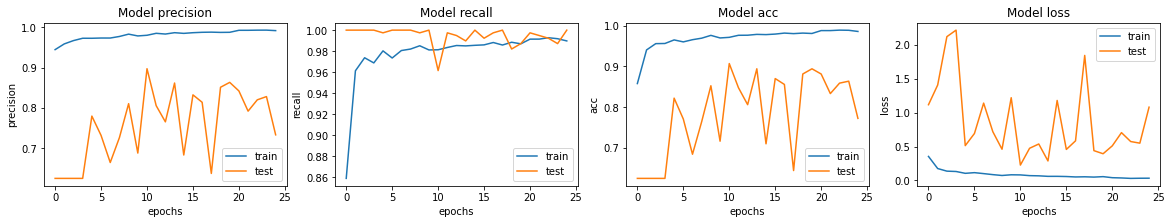

In [46]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'acc', 'loss']):
    ax[i].plot(H.history[met])
    ax[i].plot(H.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'test'])

In [47]:
target_dir = "/content/drive/MyDrive/TKC"
model.save(target_dir + '/model.h5')

In [48]:
loss, acc, prec, rec = model.evaluate(x_test, y_test)
print(f"Loss = {loss * 100:.2f} %")
print(f"Accuracy = {acc * 100:.2f} %")
print(f"Precision = {prec * 100:.2f} %")
print(f"Recall = {rec * 100:.2f} %")

20/20 [==============================] - 1s 43ms/step - loss: 1.0802 - acc: 0.7724 - precision: 0.7331 - recall: 1.0000
Loss = 108.02 %
Accuracy = 77.24 %
Precision = 73.31 %
Recall = 100.00 %


In [49]:
from sklearn.metrics import classification_report

pred = model.predict(x_test)
y_pred = (pred > 0.5).astype(np.int)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.39      0.56       234
           1       0.73      1.00      0.85       390

    accuracy                           0.77       624
   macro avg       0.87      0.70      0.71       624
weighted avg       0.83      0.77      0.74       624

